In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
sns.set(color_codes=True)
titles = pd.read_csv('titles.csv', index_col=None)
cast = pd.read_csv('cast.csv')

#### Plot the number of movies in each year

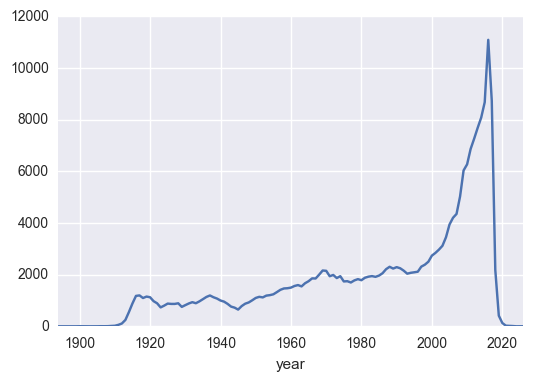

In [2]:
%matplotlib inline
t = titles
t.groupby(['year']).size().plot()

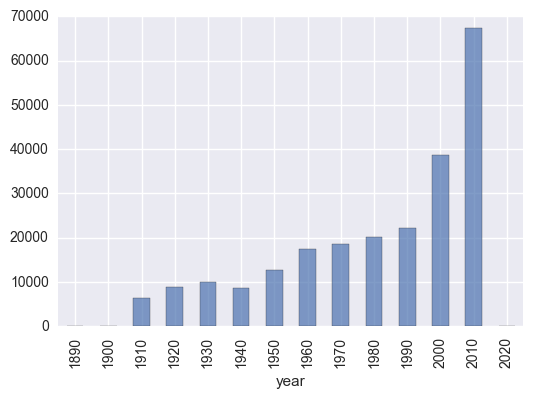

In [3]:
t.groupby(t.year//10*10).size().plot(kind = 'bar', alpha = 0.7) # number of movies per decade

#### Plot the number of movies with title Hamlet in each decade

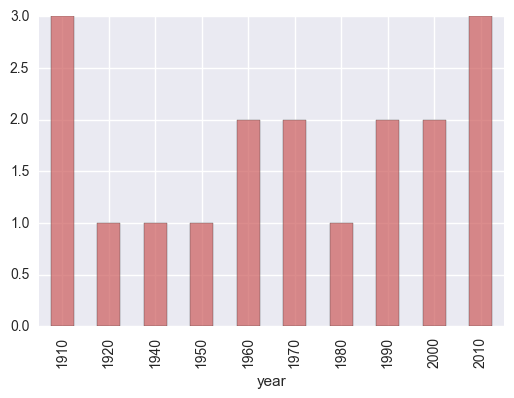

In [4]:
t_ham = t[t.title == 'Hamlet']
t_ham.groupby(t_ham.year//10*10).size().plot(kind = 'bar', color = 'indianred', alpha = 0.7) 
# number of Hamlet movies per decade 1910-2010

#### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

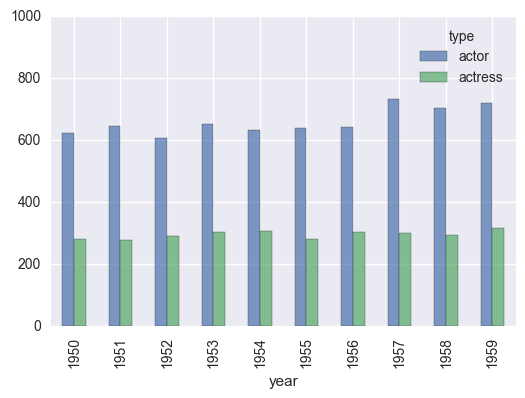

In [5]:
c = cast
c_1950 = c[c.year // 10 == 195]
c_1950 = c_1950[c_1950.n == 1]
a_1950 = c_1950.groupby(['year', 'type']).size()
a_1950 = a_1950.unstack()
a_1950.plot(kind = 'bar', ylim = [0, 1000], alpha = 0.7)

#### How does is compare to 2000?

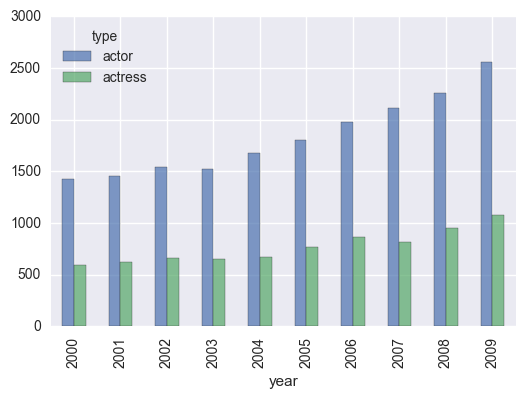

In [6]:
c = cast
c_2000 = c[c.year // 10 == 200]
c_2000 = c_2000[c_2000.n == 1]
a_2000 = c_2000.groupby(['year', 'type']).size()
a_2000 = a_2000.unstack()
a_2000.plot(kind = 'bar', ylim = [0, 3000], alpha = 0.7)

#### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5

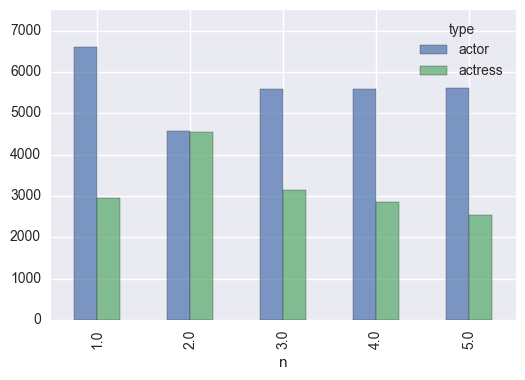

In [7]:
c = cast
c_1950 = c[(c.year // 10 * 10) == 1950]
a_1950 = c_1950[c_1950.n < 6]
a_1950 = a_1950.groupby([ 'type', 'n']).size()
a_1950 = a_1950.unstack(0)
a_1950.plot(kind = 'bar', ylim = [0, 7500], alpha = 0.7)

#### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [8]:
c_pink_panther = cast[cast.title == "The Pink Panther"]
c_pink_panther.sort_values('n').groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


#### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [9]:
c = cast
c_s_b = c[(c.character == "Superman") | (c.character == "Batman")]
c_s_b = c_s_b.groupby(['year', 'character']).size()
c_s_b = c_s_b.unstack().fillna(0)
d_s_b = c_s_b.Superman - c_s_b.Batman
print (("Superman years: ") + str (len(d_s_b[d_s_b > 0.0])))

Superman years: 12


#### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

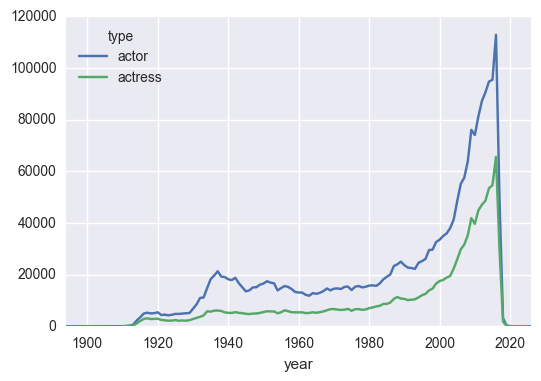

In [10]:
a = c.groupby (['year', 'type']).size()
a.unstack().plot()

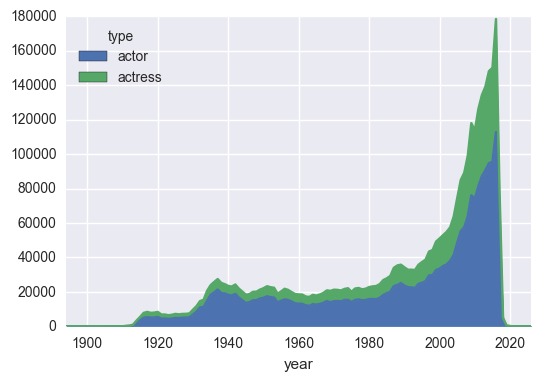

In [11]:
a.unstack().plot(kind = 'area')